In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
dataparse= lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
bajaj=pd.read_csv('BAJAJ_FIN.csv', parse_dates=['Date'],date_parser=dataparse)
bajaj.head()

C:\Users\Nachiketh\AppData\Local\Temp\ipykernel_21732\3296363364.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,BAJFINANCE,852.00,873.9,842.00,870.05,860.91,949967
1,2017-01-03,BAJFINANCE,870.00,889.0,859.25,884.00,873.63,1260264
2,2017-01-04,BAJFINANCE,887.10,891.0,868.00,871.90,875.73,971428
3,2017-01-05,BAJFINANCE,883.35,903.0,875.05,899.75,887.42,1423447
4,2017-01-06,BAJFINANCE,911.00,914.9,875.90,878.45,889.25,4040625


In [3]:
bajaj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1487 non-null   datetime64[ns]
 1   Symbol     1487 non-null   object        
 2   Open       1487 non-null   float64       
 3   High       1487 non-null   float64       
 4   Low        1487 non-null   float64       
 5   Close      1487 non-null   float64       
 6   Adj Close  1487 non-null   float64       
 7   Volume     1487 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.1+ KB


In [4]:
print(f'Dataframe contains stock price between {bajaj.Date.min()} {bajaj.Date.max()}')
print(f'Total days={(bajaj.Date.max()  - bajaj.Date.min()).days}days')

Dataframe contains stock price between 2017-01-02 00:00:00 2022-12-30 00:00:00
Total days=2188days


In [5]:
bajaj.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1.487000e+03
mean,3924.145999,3978.965972,3863.242804,3921.049731,3922.236281,2.369155e+06
std,2076.076032,2098.260099,2051.330185,2072.931916,2074.463104,2.973945e+06
min,852.000000,873.900000,842.000000,870.050000,860.910000,9.403300e+04
25%,2116.725000,2162.600000,2058.125000,2105.850000,2105.625000,8.664580e+05
50%,3390.000000,3440.000000,3315.050000,3380.050000,3389.560000,1.311855e+06
75%,5753.750000,5827.600000,5652.900000,5770.375000,5740.925000,2.379296e+06
max,8050.000000,8050.000000,7861.300000,7929.300000,7935.120000,2.596010e+07


<AxesSubplot:>

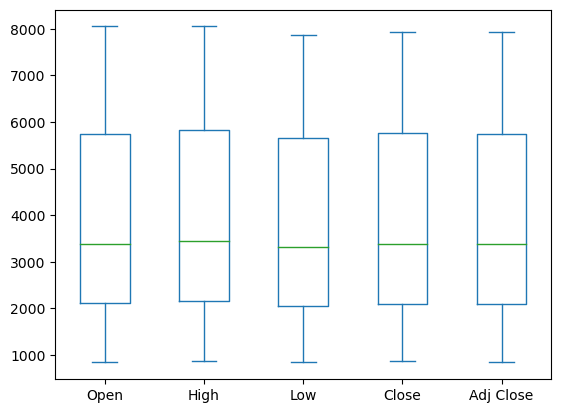

In [6]:
bajaj[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [7]:
layout=go.Layout(
    title='Stock Price Of Bajaj Finserv',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    )
)

bajaj_data=[{'x':bajaj['Date'],'y':bajaj['Close']}]
plot=go.Figure(data=bajaj_data, layout=layout)

In [8]:
iplot(plot)

In [9]:
#Building the regression model
from sklearn.model_selection import train_test_split
#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evolution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [10]:
#split the data into train and test sets
X=np.array(bajaj.index).reshape(-1,1)
Y=bajaj['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [11]:
#feature scaling
scaler=StandardScaler().fit(X_train)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [14]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = "markers",
    name = "Actual"
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
bajaj_data = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data=bajaj_data, layout=layout)

In [15]:
iplot(plot2)

In [16]:
#calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}

'''
print(scores)


Metric           Train                Test        
r2_score  0.8665192796711383	0.8593445771424474
MSE       580787.0903893618	581372.6392598209


